# Introduction

Discovering new code words in declassified CIA documents may seem like a mission for a foreign intelligence service, and detecting [gender biases](https://medium.com/agatha-codes/a-bossy-sort-of-voice-3c3a18de3093) in the Harry Potter novels a task for a literature professor. Yet by utilizing natural language parsing with regular expressions, the power to perform such analyses is in your own hands!

While you may not put much explicit thought into the structure of your sentences as you write, the syntax choices you make are critical in ensuring your writing has meaning. Analyzing such sentence structure as well as word choice can not only provide insights into the connotation of a piece text, but can also highlight the biases of its author or uncover additional insights that even a [deep, rigorous reading of the text might not reveal.](https://twitter.com/hexadecim8/status/1068215227274137605)

By using Python’s regular expression modulere and the Natural Language Toolkit, known as NLTK, you can find keywords of interest, discover where and how often they are used, and discern the parts-of-speech patterns in which they appear to understand the sometimes hidden meaning in a piece of writing. Let’s get started!



In [1]:
# Create a Chunk Counter
from collections import Counter

def np_chunk_counter(chunked_sentences):

    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract noun phrase chunks
    for chunked_sentence in chunked_sentences:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'NP'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)

In [2]:
# Chunking

from nltk import RegexpParser
from pos_tagged_oz import pos_tagged_oz

# define noun-phrase chunk grammar here
chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"

# create RegexpParser object here
chunk_parser = RegexpParser(chunk_grammar)

# create a list to hold noun-phrase chunked sentences
np_chunked_oz = list()

# create a for-loop through each pos-tagged sentence in pos_tagged_oz here
for pos_tagged_sentence in pos_tagged_oz:
  # chunk each sentence and append to np_chunked_oz here
  np_chunked_oz.append(chunk_parser.parse(pos_tagged_sentence))

# store and print the most common np-chunks here
most_common_np_chunks = np_chunk_counter(np_chunked_oz)
print(most_common_np_chunks)

[((('i', 'NN'),), 326), ((('dorothy', 'NN'),), 222), ((('the', 'DT'), ('scarecrow', 'NN')), 213), ((('the', 'DT'), ('lion', 'NN')), 148), ((('the', 'DT'), ('tin', 'NN')), 123), ((('woodman', 'NN'),), 112), ((('oz', 'NN'),), 86), ((('toto', 'NN'),), 73), ((('head', 'NN'),), 59), ((('the', 'DT'), ('woodman', 'NN')), 59), ((('the', 'DT'), ('wicked', 'JJ'), ('witch', 'NN')), 58), ((('the', 'DT'), ('emerald', 'JJ'), ('city', 'NN')), 51), ((('the', 'DT'), ('witch', 'NN')), 49), ((('the', 'DT'), ('girl', 'NN')), 46), ((('the', 'DT'), ('road', 'NN')), 41), ((('room', 'NN'),), 29), ((('nothing', 'NN'),), 29), ((('the', 'DT'), ('air', 'NN')), 29), ((('the', 'DT'), ('country', 'NN')), 26), ((('the', 'DT'), ('land', 'NN')), 24), ((('a', 'DT'), ('heart', 'NN')), 24), ((('the', 'DT'), ('west', 'NN')), 23), ((('axe', 'NN'),), 23), ((('the', 'DT'), ('sun', 'NN')), 22), ((('the', 'DT'), ('little', 'JJ'), ('girl', 'NN')), 22), ((('course', 'NN'),), 22), ((('the', 'DT'), ('cowardly', 'JJ'), ('lion', 'NN'

### 1 - Compiling and Matching

Before you dive into more complex syntax parsing, you’ll begin with basic regular expressions in Python using the re module as a regex refresher.

The first method you will explore is .compile(). This method takes a regular expression pattern as an argument and compiles the pattern into a regular expression object, which you can later use to find matching text. The regular expression object below will exactly match 4 upper or lower case characters.

regular_expression_object = re.compile("[A-Za-z]{4}")

Regular expression objects have a .match() method that takes a string of text as an argument and looks for a single match to the regular expression that starts at the beginning of the string. To see if your regular expression matches the string "Toto" you can do the following:

result = regular_expression_object.match("Toto")

If .match() finds a match that starts at the beginning of the string, it will return a match object. The match object lets you know what piece of text the regular expression matched, and at what index the match begins and ends. If there is no match, .match() will return None.

With the match object stored in result, you can access the matched text by calling result.group(0). If you use a regex containing capture groups, you can access these groups by calling .group() with the appropriately numbered capture group as an argument.

Instead of compiling the regular expression first and then looking for a match in separate lines of code, you can simplify your match to one line:

result = re.match("[A-Za-z]{4}","Toto")

With this syntax, re‘s .match() method takes a regular expression pattern as the first argument and a string as the second argument.

In [3]:
# 1 - Compiling and Matching

import re

# characters are defined
character_1 = "Dorothy"
character_2 = "Henry"

# compile your regular expression here
regular_expression = re.compile("\w{7}")

# check for a match to character_1 here
result_1 = regular_expression.match(character_1)
print(result_1)

# store and print the matched text here
match_1 = result_1.group(0)
print(match_1)

# compile a regular expression to match a 7 character string of word characters and check for a match to character_2 here
result_2 = re.match("\w{7}",character_2)
print(result_2)

<_sre.SRE_Match object; span=(0, 7), match='Dorothy'>
Dorothy
None


### 2 - Searching and Finding

You can make your regular expression matches even more dynamic with the help of the .search() method. Unlike .match() which will only find matches at the start of a string, .search() will look left to right through an entire piece of text and return a match object for the first match to the regular expression given. If no match is found, .search() will return None. For example, to search for a sequence of 8 word characters in the string Are you a Munchkin?:

result = re.search("\w{8}","Are you a Munchkin?")

Using .search() on the string above will find a match of "Munchkin", while using .match() on the same string would return None!

So far you have used methods that only return one piece of matching text. What if you want to find all the occurrences of a word or keyword in a piece of text to determine a frequency count? Step in the .findall() method!

Given a regular expression as its first argument and a string as its second argument, .findall() will return a list of all non-overlapping matches of the regular expression in the string. Consider the below piece of text:

text = "Everything is green here, while in the country of the Munchkins blue was the favorite color. But the people do not seem to be as friendly as the Munchkins, and I'm afraid we shall be unable to find a place to pass the night."

To find all non-overlapping sequences of 8 word characters in the sentence you can do the following:

list_of_matches = re.findall("\w{8}",text)

.findall() will thus return the list ['Everythi', 'Munchkin', 'favorite', 'friendly', 'Munchkin'].

In [4]:
# Searching and Finding

import re
from sherlock_holmes import bohemia_ch1

# import L. Frank Baum's The Wonderful Wizard of Oz
#oz_text = open("the_wizard_of_oz_text.txt",encoding='utf-8').read().lower()

oz_text = bohemia_ch1

# search oz_text for an occurrence of 'Baker' here
found_Baker = re.search("Baker", oz_text)
print(found_Baker)

# find all the occurrences of 'Holmes' in oz_text here
all_Holmes = re.findall("Holmes", oz_text)
print(all_Holmes)

# store and print the length of all_lions here
number_Holmes = len(all_Holmes)
print(number_Holmes)

print('-'*30)
# To Inspect a Function, use

import inspect
print(inspect.getsource(np_chunk_counter))

<_sre.SRE_Match object; span=(1528, 1533), match='Baker'>
['Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes']
24
------------------------------
def np_chunk_counter(chunked_sentences):

    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract noun phrase chunks
    for chunked_sentence in chunked_sentences:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'NP'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)



### 3 - Part-of-Speech Tagging

While it is useful to match and search for patterns of individual characters in a text, you can often find more meaning by analyzing text on a word-by-word basis, focusing on the part of speech of each word in a sentence. This process of identifying and labeling the part of speech of words is known as part-of-speech tagging!

It may have been a while since you’ve been in English class, so let’s review the nine parts of speech with an example:

Wow! Ramona and her class are happily studying the new textbook she has on NLP.

- Noun: the name of a person (Ramona,class), place, thing (textbook), or idea (NLP)
- Pronoun: a word used in place of a noun (her,she)
- Determiner: a word that introduces, or “determines”, a noun (the)
- Verb: expresses action (studying) or being (are,has)
- Adjective: modifies or describes a noun or pronoun (new)
- Adverb: modifies or describes a verb, an adjective, or another adverb (happily)
- Preposition: a word placed before a noun or pronoun to form a phrase modifying another word in the sentence (on)
- Conjunction: a word that joins words, phrases, or clauses (and)
- Interjection: a word used to express emotion (Wow)

You can automate the part-of-speech tagging process with nltk‘s pos_tag() function! The function takes one argument, a list of words in the order they appear in a sentence, and returns a list of tuples, where the first entry in the tuple is a word and the second is the part-of-speech tag.

Given the sentence split into a list of words below:

word_sentence = ['do', 'you', 'suppose', 'oz', 'could', 'give', 'me', 'a', 'heart', '?']<br>

you can tag the parts of speech as follows:

part_of_speech_tagged_sentence = pos_tag(word_sentence) <br>
The call to pos_tag() will return the following:

[('do', 'VB'), ('you', 'PRP'), ('suppose', 'VB'), ('oz', 'NNS'), ('could', 'MD'), ('give', 'VB'), ('me', 'PRP'), ('a', 'DT'), ('heart', 'NN'), ('?', '.')]

Abbreviations are given instead of the full part of speech name. Some common abbreviations include: NN for nouns, VB for verbs, RB for adverbs, JJ for adjectives, and DT for determiners. [A complete list of part-of-speech tags and their abbreviations can be found here.](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

In [5]:
# 4 - POS Tagging

import nltk
from nltk import pos_tag
from word_tokenized_oz import word_tokenized_oz # Already Sentence Tokenized

# save and print the sentence stored at index 100 in word_tokenized_oz here

witches_fate = word_tokenized_oz[100]
print(witches_fate)
# ['``', 'the', 'house', 'must', 'have', 'fallen', 'on', 'her', '.']

# create a list to hold part-of-speech tagged sentences here
pos_tagged_oz  = list()

# create a for loop through each word tokenized sentence in word_tokenized_oz here
for text in word_tokenized_oz:
  # part-of-speech tag each sentence and append to pos_tagged_oz here
  pos_tagged_oz.append(pos_tag(text))

# store and print the 101st part-of-speech tagged sentence here
witches_fate_pos = pos_tagged_oz[100]
# [('``', '``'), ('the', 'DT'), ('house', 'NN'), ('must', 'MD'), ('have', 'VB'), ('fallen', 'VBN'), ('on', 'IN'), ('her', 'PRP'), ('.', '.')]

print(witches_fate_pos)

['``', 'the', 'house', 'must', 'have', 'fallen', 'on', 'her', '.']
[('``', '``'), ('the', 'DT'), ('house', 'NN'), ('must', 'MD'), ('have', 'VB'), ('fallen', 'VBN'), ('on', 'IN'), ('her', 'PRP'), ('.', '.')]


### 4 - Introduction to Chunking

You have made it to the juicy stuff! Given your part-of-speech tagged text, you can now use regular expressions to find patterns in sentence structure that give insight into the meaning of a text. This technique of grouping words by their part-of-speech tag is called chunking.

With chunking in nltk, you can define a pattern of parts-of-speech tags using a modified notation of regular expressions. You can then find non-overlapping matches, or chunks of words, in the part-of-speech tagged sentences of a text.

The regular expression you build to find chunks is called chunk grammar. A piece of chunk grammar can be written as follows:

chunk_grammar = "AN: {\<\JJ\>\<\NN\>\}"
    
AN is a user-defined name for the kind of chunk you are searching for. You can use whatever name makes sense given your chunk grammar. In this case AN stands for adjective-noun
    
A pair of curly braces {} surround the actual chunk grammar

\<\JJ> operates similarly to a regex character class, matching any adjective

\<\NN> matches any noun, singular or plural
The chunk grammar above will thus match any adjective that is followed by a noun.

To use the chunk grammar defined, you must create a nltk RegexpParser object and give it a piece of chunk grammar as an argument.

chunk_parser = RegexpParser(chunk_grammar)

You can then use the RegexpParser object’s .parse() method, which takes a list of part-of-speech tagged words as an argument, and identifies where such chunks occur in the sentence!

Consider the part-of-speech tagged sentence below:

pos_tagged_sentence = [('where', 'WRB'), ('is', 'VBZ'), ('the', 'DT'), ('emerald', 'JJ'), ('city', 'NN'), ('?', '.')]
 
You can chunk the sentence to find any adjectives followed by a noun with the following:

chunked = chunk_parser.parse(pos_tagged_sentence)


In [9]:
# 4 - Chunking via Grammatical Joins

from nltk import RegexpParser, Tree
from pos_tagged_oz import pos_tagged_oz

# define adjective-noun chunk grammar here - JJ - Adjective, NN - Noun
chunk_grammar = "AN: {<JJ><NN>}"

# create RegexpParser object here
chunk_parser = RegexpParser(chunk_grammar)

# chunk the pos-tagged sentence at index 282 in pos_tagged_oz here
scaredy_cat = chunk_parser.parse(pos_tagged_oz[282])

# pretty_print the chunked sentence here
# Tree.fromstring(str(scaredy_cat)).pretty_print()
Tree.fromstring(str(scaredy_cat)).pretty_print()

                         S                                    
   ______________________|__________________________           
  |       |       |      |     |    |               AN        
  |       |       |      |     |    |        _______|_____     
``/`` where/WRB is/VBZ the/DT ?/. ''/'' emerald/JJ     city/NN



#### Chunking Noun Phrases

While you are able to chunk any sequence of parts of speech that you like, there are certain types of chunking that are linguistically helpful for determining meaning and bias in a piece of text. One such type of chunking is NP-chunking, or noun phrase chunking. A noun phrase is a phrase that contains a noun and operates, as a unit, as a noun.

A popular form of noun phrase begins with a determiner DT, which specifies the noun being referenced, followed by any number of adjectives JJ, which describe the noun, and ends with a noun NN.

Consider the part-of-speech tagged sentence below:

[('we', 'PRP'), ('are', 'VBP'), ('so', 'RB'), ('grateful', 'JJ'), ('to', 'TO'), ('you', 'PRP'), ('for', 'IN'), ('having', 'VBG'), ('killed', 'VBN'), ('the', 'DT'), ('wicked', 'JJ'), ('witch', 'NN'), ('of', 'IN'), ('the', 'DT'), ('east', 'NN'), (',', ','), ('and', 'CC'), ('for', 'IN'), ('setting', 'VBG'), ('our', 'PRP$'), ('people', 'NNS'), ('free', 'VBP'), ('from', 'IN'), ('bondage', 'NN'), ('.', '.')]

Can you spot the three noun phrases of the form described above? They are:

(('the', 'DT'), ('wicked', 'JJ'), ('witch', 'NN')) <br>
(('the', 'DT'), ('east', 'NN'))<br>
(('bondage', 'NN'))<br>

With the help of a regular expression defined chunk grammar, you can easily find all the non-overlapping noun phrases in a piece of text! Just like in normal regular expressions, you can use quantifiers to indicate how many of each part of speech you want to match.

The chunk grammar for a noun phrase can be written as follows:

chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"<br>

- NP is the user-defined name of the chunk you are searching for. In this case NP stands for noun phrase<br>
- <DT> matches any determiner<br>
- ? is an optional quantifier, matching either 0 or 1 determiners<br>
- <JJ> matches any adjective<br>
- \* is the Kleene star quantifier, matching 0 or more occurrences of an adjective<br>
- <NN> matches any noun, singular or plural<br>

By finding all the NP-chunks in a text, you can perform a frequency analysis and identify important, recurring noun phrases. <br>
You can also use these NP-chunks as pseudo-topics and tag articles and documents by their highest count NP-chunks! Or perhaps your analysis has you looking at the adjective choices an author makes for different nouns.

It is ultimately up to you, with your knowledge of the text you are working with, to interpret the meaning and use-case of the NP-chunks and their frequency of occurrence.

In [11]:
# A popular form of noun phrase begins with a determiner DT, which specifies the noun being referenced, followed by any number 
# of adjectives JJ, which describe the noun, and ends with a noun NN.
# Eg: (('the', 'DT'), ('wicked', 'JJ'), ('witch', 'NN'))
#     (('the', 'DT'), ('east', 'NN'))
#     (('bondage', 'NN'))

# Finding all the non-overlapping noun phrases in a piece of text
from nltk import RegexpParser

# define noun-phrase chunk grammar here
chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"

# create RegexpParser object here
chunk_parser = RegexpParser(chunk_grammar)

# create a list to hold noun-phrase chunked sentences
np_chunked_oz = list()

# create a for loop through each pos-tagged sentence in pos_tagged_oz here

for token in pos_tagged_oz: # pos_tagged_oz is already mapped and imported from text file
  # chunk each sentence and append to np_chunked_oz here
    chunked_sent = chunk_parser.parse(token)
    np_chunked_oz.append(chunked_sent)

# store and print the most common np-chunks here, np_chunk_counter Function is already Defined first

most_common_np_chunks = np_chunk_counter(np_chunked_oz)
print(most_common_np_chunks)

[((('i', 'NN'),), 326), ((('dorothy', 'NN'),), 222), ((('the', 'DT'), ('scarecrow', 'NN')), 213), ((('the', 'DT'), ('lion', 'NN')), 148), ((('the', 'DT'), ('tin', 'NN')), 123), ((('woodman', 'NN'),), 112), ((('oz', 'NN'),), 86), ((('toto', 'NN'),), 73), ((('head', 'NN'),), 59), ((('the', 'DT'), ('woodman', 'NN')), 59), ((('the', 'DT'), ('wicked', 'JJ'), ('witch', 'NN')), 58), ((('the', 'DT'), ('emerald', 'JJ'), ('city', 'NN')), 51), ((('the', 'DT'), ('witch', 'NN')), 49), ((('the', 'DT'), ('girl', 'NN')), 46), ((('the', 'DT'), ('road', 'NN')), 41), ((('room', 'NN'),), 29), ((('nothing', 'NN'),), 29), ((('the', 'DT'), ('air', 'NN')), 29), ((('the', 'DT'), ('country', 'NN')), 26), ((('the', 'DT'), ('land', 'NN')), 24), ((('a', 'DT'), ('heart', 'NN')), 24), ((('the', 'DT'), ('west', 'NN')), 23), ((('axe', 'NN'),), 23), ((('the', 'DT'), ('sun', 'NN')), 22), ((('the', 'DT'), ('little', 'JJ'), ('girl', 'NN')), 22), ((('course', 'NN'),), 22), ((('the', 'DT'), ('cowardly', 'JJ'), ('lion', 'NN'

#### Chunking Verb Phrases

Another popular type of chunking is VP-chunking, or verb phrase chunking. A verb phrase is a phrase that contains a verb and its complements, objects, or modifiers.

Verb phrases can take a variety of structures, and here you will consider two. The first structure begins with a verb VB of any tense, followed by a noun phrase, and ends with an optional adverb RB of any form. The second structure switches the order of the verb and the noun phrase, but also ends with an optional adverb.

Both structures are considered because verb phrases of each form are essentially the same in meaning. For example, consider the part-of-speech tagged verb phrases given below:

(('said', 'VBD'), ('the', 'DT'), ('cowardly', 'JJ'), ('lion', 'NN'))
('the', 'DT'), ('cowardly', 'JJ'), ('lion', 'NN')), (('said', 'VBD'),

The chunk grammar to find the first form of verb phrase is given below:

- chunk_grammar = "VP: {<VB.*><DT>?<JJ>*<NN><RB.?>?}"
- VP is the user-defined name of the chunk you are searching for. In this case VP stands for verb phrase
- <VB.*> matches any verb using the . as a wildcard and the * quantifier to match 0 or more occurrences of any character. This ensures matching verbs of any tense (ex. VB for present tense, VBD for past tense, or VBN for past participle)
- <DT>?<JJ>*<NN> matches any noun phrase
- <RB.?> matches any adverb using the . as a wildcard and the optional quantifier to match 0 or 1 occurrence of any character. This ensures matching any form of adverb (regular RB, comparative RBR, or superlative RBS)
- ? is an optional quantifier, matching either 0 or 1 adverbs

The chunk grammar for the second form of verb phrase is given below:

chunk_grammar = "VP: {<DT>?<JJ>*<NN><VB.*><RB.?>?}"
 
Just like with NP-chunks, you can find all the VP-chunks in a text and perform a frequency analysis to identify important, recurring verb phrases. These verb phrases can give insight into what kind of action different characters take or how the actions that characters take are described by the author.

Once again, this is the part of the analysis where you get to be creative and use your own knowledge about the text you are working with to find interesting insights!

In [12]:
# Create Chunk COunter Function for Verb - Pronoun

from collections import Counter

# function that pulls chunks out of chunked sentence and finds the most common chunks
def vp_chunk_counter(chunked_sentences):

    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract verb phrase chunks
    for chunked_sentence in chunked_sentences:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'VP'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)

In [15]:
# Chunking Verb Phrases

from nltk import RegexpParser

"""
VP is the user-defined name of the chunk you are searching for. In this case VP stands for verb phrase
<VB.*> matches any verb using the . as a wildcard and the * quantifier to match 0 or more occurrences of any character. This ensures matching verbs of any tense (ex. VB for present tense, VBD for past tense, or VBN for past participle)
<DT>?<JJ>*<NN> matches any noun phrase
<RB.?> matches any adverb using the . as a wildcard and the optional quantifier to match 0 or 1 occurrence of any character. This ensures matching any form of adverb (regular RB, comparative RBR, or superlative RBS)
? is an optional quantifier, matching either 0 or 1 adverbs
"""


# define verb phrase chunk grammar here
chunk_grammar = "VP: {<VB.*><DT>?<JJ>*<NN><RB.?>?}"

# grammar to find a verb phrase of the following form: noun phrase, followed by a verb VB, followed by an optional adverb RB
chunk_grammar = "VP: {<DT>?<JJ>*<NN><VB.*><RB.?>?}"

# create RegexpParser object here
chunk_parser = RegexpParser(chunk_grammar)

# create a list to hold verb-phrase chunked sentences
vp_chunked_oz = list()

# create for loop through each pos-tagged sentence in pos_tagged_oz here
for token in pos_tagged_oz:
  # chunk each sentence and append to vp_chunked_oz here
    vp_chunked_oz.append(chunk_parser.parse(token))
    
# store and print the most common vp-chunks here
most_common_vp_chunks = vp_chunk_counter(vp_chunked_oz)
print(most_common_vp_chunks)

[((('i', 'NN'), ('am', 'VBP')), 24), ((('i', 'NN'), ('was', 'VBD')), 17), ((('dorothy', 'NN'), ('was', 'VBD')), 13), ((('i', 'NN'), ('have', 'VBP')), 9), ((('i', 'NN'), ('know', 'VBP')), 8), ((('i', 'NN'), ('had', 'VBD')), 8), ((('dorothy', 'NN'), ('had', 'VBD')), 7), ((('oz', 'NN'), ('had', 'VBD')), 7), ((('the', 'DT'), ('scarecrow', 'NN'), ('said', 'VBD')), 6), ((('i', 'NN'), ('am', 'VBP'), ('oz', 'RB')), 6), ((('oz', 'NN'), ('was', 'VBD')), 6), ((('toto', 'NN'), ('did', 'VBD'), ('not', 'RB')), 5), ((('dorothy', 'NN'), ('looked', 'VBD')), 5), ((('i', 'NN'), ('have', 'VBP'), ('never', 'RB')), 5), ((('the', 'DT'), ('wicked', 'JJ'), ('witch', 'NN'), ('had', 'VBD')), 5), ((('i', 'NN'), ("'m", 'VBP')), 5), ((('i', 'NN'), ('do', 'VBP'), ("n't", 'RB')), 5), ((('i', 'NN'), ('want', 'VBP')), 5), ((('the', 'DT'), ('scarecrow', 'NN'), ('had', 'VBD')), 5), ((('the', 'DT'), ('balloon', 'NN'), ('was', 'VBD')), 4), ((('the', 'DT'), ('cyclone', 'NN'), ('had', 'VBD')), 4), ((('i', 'NN'), ('came', 'VB

#### Chunk Filtering

Another option you have to find chunks in your text is chunk filtering. Chunk filtering lets you define what parts of speech you do not want in a chunk and remove them.

A popular method for performing chunk filtering is to chunk an entire sentence together and then indicate which parts of speech are to be filtered out. If the filtered parts of speech are in the middle of a chunk, it will split the chunk into two separate chunks! The chunk grammar you can use to perform chunk filtering is given below:

chunk_grammar = """NP: {<.*>+}
                       }<VB.?|IN>+{"""

NP is the user-defined name of the chunk you are searching for. In this case NP stands for noun phrase

The brackets {} indicate what parts of speech you are chunking. <.*>+ matches every part of speech in the sentence

The inverted brackets }{ indicate which parts of speech you want to filter from the chunk. <VB.?|IN>+ will filter out any verbs or prepositions

Chunk filtering provides an alternate way for you to search through a text and find the chunks of information useful for your analysis!

In [16]:
# Chunking by Filtering

from nltk import RegexpParser, Tree

# define chunk grammar to chunk an entire sentence together
grammar = "Chunk: {<.*>+}"

# create RegexpParser object
parser = RegexpParser(grammar)

# chunk the pos-tagged sentence at index 230 in pos_tagged_oz
chunked_dancers = parser.parse(pos_tagged_oz[230])
print(chunked_dancers)

# define noun phrase chunk grammar using chunk filtering here
chunk_grammar = """NP: {<.*>+}
                       }<VB.?|IN>+{"""

# create RegexpParser object here
chunk_parser = RegexpParser(chunk_grammar)

# chunk and filter the pos-tagged sentence at index 230 in pos_tagged_oz here
filtered_dancers = chunk_parser.parse(pos_tagged_oz[230])
print(filtered_dancers)


# pretty_print the chunked and filtered sentence here
# Tree.fromstring(str(filtered_dancers)).pretty_print()
Tree.fromstring(str(filtered_dancers)).pretty_print()

(S
  (Chunk
    then/RB
    she/PRP
    sat/VBD
    upon/IN
    a/DT
    settee/NN
    and/CC
    watched/VBD
    the/DT
    people/NNS
    dance/NN
    ./.))
(S
  (NP then/RB she/PRP)
  sat/VBD
  upon/IN
  (NP a/DT settee/NN and/CC)
  watched/VBD
  (NP the/DT people/NNS dance/NN ./.))
                                                 S                                                  
    _____________________________________________|_______________________________                    
   |       |         |               NP                  NP                      NP                 
   |       |         |          _____|_____       _______|_______        ________|________________   
sat/VBD upon/IN watched/VBD then/RB     she/PRP a/DT settee/NN and/CC the/DT people/NNS dance/NN ./.



### Review

And there you go! Now you have the toolkit to dig into any piece of text data and perform natural language parsing with regular expressions. What insights will you gain, or what bias may you uncover? Let’s review what you have learned:

- The re module’s .compile() and .match() methods allow you to enter any regex pattern and look for a single match at the beginning of a piece of text
- The re module’s .search() method lets you find a single match to a regex pattern anywhere in a string, while the .findall() method finds all the matches of a regex pattern in a string
- Part-of-speech tagging identifies and labels the part of speech of words in a sentence, and can be performed in nltk using the pos_tag() function
- Chunking groups together patterns of words by their part-of-speech tag. Chunking can be performed in nltk by defining a piece of chunk grammar using regular expression syntax and calling a RegexpParser‘s .parse() method on a word tokenized sentence
- NP-chunking chunks together an optional determiner DT, any number of adjectives JJ, and a noun NN to form a noun phrase. The frequency of different NP-chunks can identify important topics in a text or demonstrate how an author describes different subjects
- VP-chunking chunks together a verb VB, a noun phrase, and an optional adverb RB to form a verb phrase. The frequency of different VP-chunks can give insight into what kind of action different subjects take or how the actions that different subjects take are described by an author, potentially indicating bias
- Chunk filtering provides an alternative means of chunking by specifying what parts of speech you do not want in a chunk and removing them

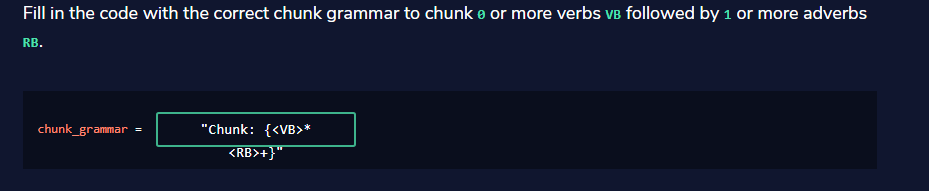

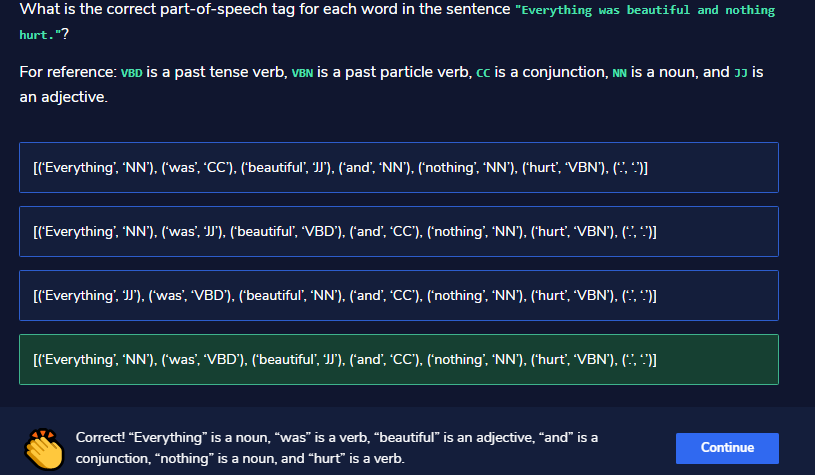

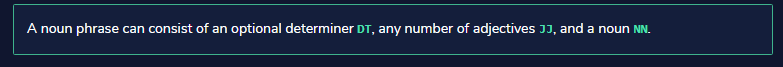

<b>Verb phrase chunking</b> is useful for gaining insight into the action that characters and subjects take as well as how that action is described by the author.

The .parse() method uses the RegexpParser‘s chunk grammar to chunk a sentence that is passed to it

.search() will scan through text from left to right looking for the first 7 character word sequence, which is "pretend".